# 1. Data Preprocessing

## Group Project : Classification modelling for chocolate dataset  

Description of dataset - Data set is from Brady Brelinski,founder member of Manhattan chocolate society also used in Kaggle competition


# Columns description 
- Company (Maker-if known): name of the company (string)
- Specific Bean Origin: the geographical origin for the chocolate bar (string).
- REF: a value indicating when the review was entered in the database. A higher value indicates more recently entered (integer).
- Review Year: the year of the review published (integer).
- Cocoa Percentage: cocoa percentage of the chocolate bar (string).
- Company Location: the country of the manufacturer (string).
- Rating: expert rating for the chocolate bar (float). This is the label to be predicted by the model. It is a number from 1 (lowest quality) to 5 (highest quality).
- Bean Type: the type of cocoa bean used (string).
- Broad Bean Origin: the broader geographical origin of the cocoa bean (string).

# Dataset dimension
Sample (rows): 1500
Attributes (columns):9(including the target:rating)

## 1) Data Preprocessing 

# 1.1 Importing libraries 


In [1]:
#Loading Required Libraries
#Import Libraries for Modelling
#Import Libraries for Map
# Import Libraries for HTML output display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats
import os
import sys
import re
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from pandas import Series, DataFrame
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# 1.2 Data Exploration

In [2]:
#loading data set
df = pd.read_csv("chocolate.csv")

In [3]:
# Display dataset top 10 values
df.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
5,Salgado,Rio Arriba,292,2008,70%,Argentina,3.50,Forastero (Arriba) ASSS,Ecuador
6,Cacao Store,Madagascar,1684,2015,70%,Japan,3.00,Trinitario,Madagascar
7,Kaoka (Cemoi),Noir,404,2009,70%,France,2.75,,
8,Woodblock,Gran Couva,1042,2013,70%,U.S.A.,3.50,Trinitario,Trinidad
9,Dormouse,"Colombia, Batch 9",1676,2015,80%,U.K.,2.75,"Criollo, Trinitario",Colombia


In [4]:
#checking null values
df.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [5]:
#Checking Duplicate Values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1470    False
1471    False
1472    False
1473    False
1474    False
1475    False
1476    False
1477    False
1478    False
1479    False
1480    False
1481    False
1482    False
1483    False
1484    False
1485    False
1486    False
1487    False
1488    False
1489    False
1490    False
1491    False
1492    False
1493    False
1494    False
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns = ['Company_Makers','Specific_bean_Origin_or_Bar_Name','Ref',
                     'Review_Date','Cocoa_Percent','Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Origin']

In [8]:
# Descriptive Statics
df.describe()

,Ref,Review_Date,Rating
count,1500.000000,1500.000000,1500.000000
mean,1036.881333,2012.326000,3.183167
std,554.693828,2.933734,0.484319
min,5.000000,2006.000000,1.000000
25%,572.000000,2010.000000,2.750000
50%,1071.000000,2013.000000,3.250000
75%,1503.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Company_Makers                      1500 non-null object
Specific_bean_Origin_or_Bar_Name    1500 non-null object
Ref                                 1500 non-null int64
Review_Date                         1500 non-null int64
Cocoa_Percent                       1500 non-null object
Company_Location                    1500 non-null object
Rating                              1500 non-null float64
Bean_Type                           1499 non-null object
Broad_Bean_Origin                   1499 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 105.5+ KB


In [10]:
# Display dataset top  values
df.head(10)

,Company_Makers,Specific_bean_Origin_or_Bar_Name,Ref,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
5,Salgado,Rio Arriba,292,2008,70%,Argentina,3.50,Forastero (Arriba) ASSS,Ecuador
6,Cacao Store,Madagascar,1684,2015,70%,Japan,3.00,Trinitario,Madagascar
7,Kaoka (Cemoi),Noir,404,2009,70%,France,2.75,,
8,Woodblock,Gran Couva,1042,2013,70%,U.S.A.,3.50,Trinitario,Trinidad
9,Dormouse,"Colombia, Batch 9",1676,2015,80%,U.K.,2.75,"Criollo, Trinitario",Colombia


In [11]:
#Display rename columns list
df.columns = df.columns.str.strip()

In [12]:
# Display dataset top 5 values
df.head(5)

,Company_Makers,Specific_bean_Origin_or_Bar_Name,Ref,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [13]:
#checking null value column in bean type and broad bean origin
df[df['Bean_Type'].isnull()]

,Company_Makers,Specific_bean_Origin_or_Bar_Name,Ref,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
177,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [14]:
# Display bean origin null values
df[df['Broad_Bean_Origin'].isnull()]

,Company_Makers,Specific_bean_Origin_or_Bar_Name,Ref,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
750,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


In [15]:
df['Broad_Bean_Origin'].fillna(df['Broad_Bean_Origin'].mode()[0], inplace=True) #filling null values
df['Bean_Type'].fillna(df['Bean_Type'].mode()[0], inplace=True) #filling null values

In [16]:
# Check unique values of Bean_Type
df['Bean_Type'].unique()

array(['Criollo, Trinitario', 'Blend', 'Matina', '\xc2\xa0', 'CCN51',
       'Forastero (Arriba) ASSS', 'Trinitario', 'Criollo', 'Amazon mix',
       'Nacional', 'Forastero (Arriba)', 'Forastero (Nacional)',
       'Forastero (Arriba) ASS', 'Forastero', 'Criollo (Ocumare 61)',
       'Trinitario, Criollo', 'Trinitario (85% Criollo)',
       'Criollo (Amarru)', 'Beniano', 'Forastero (Parazinho)',
       'Criollo (Porcelana)', 'Criollo (Ocumare 67)', 'Criollo (Wild)',
       'Nacional (Arriba)', 'Criollo, Forastero', 'Amazon, ICS',
       'Blend-Forastero,Criollo', 'Trinitario (Amelonado)', 'EET',
       'Trinitario, TCGA', 'Forastero, Trinitario',
       'Trinitario, Nacional', 'Trinitario, Forastero',
       'Trinitario (Scavina)', 'Criollo (Ocumare 77)',
       'Forastero (Catongo)'], dtype=object)

In [17]:
# Check unique values of Broad_Bean_Origin
df['Broad_Bean_Origin'].unique()

array(['Madagascar', '\xc2\xa0', 'Costa Rica', 'Nicaragua', 'Colombia',
       'Ecuador', 'Trinidad', 'Venezuela', 'Dominican Republic', 'Peru',
       'Peru, Mad., Dom. Rep.', 'Domincan Republic', 'Jamaica', 'Vietnam',
       'Mexico', 'Honduras', 'Guatemala', 'Sri Lanka', 'Indonesia',
       'Puerto Rico', 'St. Lucia', 'Hawaii', 'Peru, Ecuador', 'Ghana',
       'Brazil', 'Ivory Coast', 'Uganda', 'Samoa', 'Tanzania',
       'Papua New Guinea', 'Togo', 'Bolivia', 'Panama', 'Belize',
       'Vanuatu', 'Fiji', 'Peru, Madagascar', 'Central and S. America',
       'Tobago', 'Sao Tome', 'Trinidad, Tobago', 'Cuba',
       'Ven, Bolivia, D.R.', 'Sao Tome & Principe', 'Carribean',
       'Venezuela, Dom. Rep.', 'Dominican Rep., Bali',
       'Ghana, Panama, Ecuador', 'Grenada', 'Principe',
       'Venezuela, Trinidad', 'Australia', 'South America',
       'Colombia, Ecuador', 'Ecuador, Costa Rica',
       'South America, Africa', 'Malaysia', 'Congo', 'PNG, Vanuatu, Mad',
       'Gre., PNG, Haw

In [18]:
# Replace blank values in Broad_Bean_Origin with the mode
print('Broad_Bean_Origin')
to_replace = {
    '\xc2\xa0': df['Broad_Bean_Origin'].mode()[0]
}
df['Broad_Bean_Origin'].replace(to_replace, inplace=True)
print(df['Broad_Bean_Origin'].unique())

Broad_Bean_Origin
['Madagascar' 'Venezuela' 'Costa Rica' 'Nicaragua' 'Colombia' 'Ecuador'
 'Trinidad' 'Dominican Republic' 'Peru' 'Peru, Mad., Dom. Rep.'
 'Domincan Republic' 'Jamaica' 'Vietnam' 'Mexico' 'Honduras' 'Guatemala'
 'Sri Lanka' 'Indonesia' 'Puerto Rico' 'St. Lucia' 'Hawaii'
 'Peru, Ecuador' 'Ghana' 'Brazil' 'Ivory Coast' 'Uganda' 'Samoa'
 'Tanzania' 'Papua New Guinea' 'Togo' 'Bolivia' 'Panama' 'Belize'
 'Vanuatu' 'Fiji' 'Peru, Madagascar' 'Central and S. America' 'Tobago'
 'Sao Tome' 'Trinidad, Tobago' 'Cuba' 'Ven, Bolivia, D.R.'
 'Sao Tome & Principe' 'Carribean' 'Venezuela, Dom. Rep.'
 'Dominican Rep., Bali' 'Ghana, Panama, Ecuador' 'Grenada' 'Principe'
 'Venezuela, Trinidad' 'Australia' 'South America' 'Colombia, Ecuador'
 'Ecuador, Costa Rica' 'South America, Africa' 'Malaysia' 'Congo'
 'PNG, Vanuatu, Mad' 'Gre., PNG, Haw., Haiti, Mad' 'Haiti' 'Philippines'
 'Ven., Trinidad, Mad.' 'Suriname' 'Peru, Ecuador, Venezuela' 'Martinique'
 'Dom. Rep., Madagascar' 'Peru, Belize'

In [19]:
#The mode of Bean_Type is ' '
# Replace blank values in Bean_Type
# Replace with second highest count value after ' '
print(df['Bean_Type'].value_counts())
print('Bean_Type')
to_replace = {
    '\xc2\xa0': 'Trinitario'
}
df['Bean_Type'].replace(to_replace, inplace=True)
print(df['Bean_Type'].unique())

                            751
Trinitario                  342
Criollo                     128
Forastero                    67
Forastero (Nacional)         46
Blend                        34
Criollo, Trinitario          33
Forastero (Arriba)           32
Trinitario, Criollo           9
Criollo (Porcelana)           8
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Nacional (Arriba)             3
Amazon mix                    2
Amazon, ICS                   2
Criollo (Ocumare 61)          2
Criollo, Forastero            2
Matina                        2
Trinitario (85% Criollo)      2
Trinitario (Scavina)          1
Forastero, Trinitario         1
Criollo (Ocumare 67)          1
Criollo (Ocumare 77)          1
Trinitario, Nacional          1
CCN51                         1
Forastero (Catongo)           1
Trinitario (Amelonado)        1
Trinitario, TCGA              1
Forastero (Arriba) ASSS       1
Nacional

In [20]:
# Display null values into dataset after function executation
df.isnull().sum()

Company_Makers                      0
Specific_bean_Origin_or_Bar_Name    0
Ref                                 0
Review_Date                         0
Cocoa_Percent                       0
Company_Location                    0
Rating                              0
Bean_Type                           0
Broad_Bean_Origin                   0
dtype: int64

In [21]:
#Save cleaned data file
df.to_csv('cleaned_chocolate.csv')

Text(0.5,1,'Companies with the Highest Chocolate Vendors')

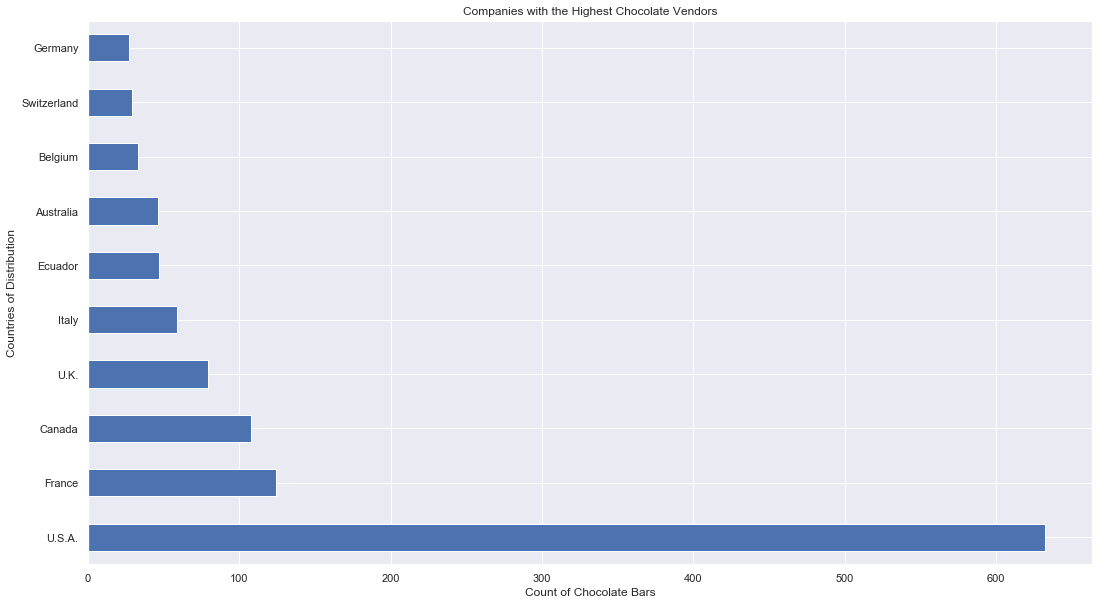

In [22]:
plt.rcParams['figure.figsize'] = (18,10)
# Create count bar plot of comapny location
df['Company_Location'].value_counts().head(10).plot('barh') #displaying top 10 company locations
# Set the Xlabel on graph
plt.xlabel('Count of Chocolate Bars')
# Set the Ylabel on graph
plt.ylabel('Countries of Distribution')
# Set the title on graph
plt.title("Companies with the Highest Chocolate Vendors")

In [23]:
rating = {'Rating':['size','mean','std']}
df.groupby('Company_Location').agg(rating)

Rating                    
                    size      mean       std
Company_Location                            
Amsterdam              3  3.500000  0.250000
Argentina              7  3.464286  0.172516
Australia             46  3.347826  0.426479
Austria               22  3.227273  0.344248
Belgium               33  3.090909  0.865615
Bolivia                2  3.250000  0.707107
Brazil                14  3.375000  0.376599
Canada               108  3.328704  0.435901
Chile                  2  3.750000  0.000000
Colombia              22  3.159091  0.478996
Costa Rica             8  3.125000  0.377964
Czech Republic         1  2.750000       NaN
Denmark               14  3.303571  0.297078
Domincan Republic      5  3.200000  0.209165
Ecuador               47  2.984043  0.592994
Fiji                   3  3.250000  0.433013
France               124  3.252016  0.537701
Germany               27  3.212963  0.508125
Ghana                  1  2.750000       NaN
Grenada                3  2.833333  0.381881
Guatemala              9  3.361111  0.416667
Honduras               6  3.208333  0.292261
Hungary               19  3.223684  0.398737
Iceland                2  3.250000  0.353553
India                  1  2.500000       NaN
Ireland                2  3.000000  0.353553
Israel                 8  3.218750  0.471273
Italy                 59  3.313559  0.609892
Japan                 17  3.088235  0.352903
Lithuania              5  3.150000  0.575543
Madagascar            13  3.230769  0.461672
Martinique             1  2.750000       NaN
Mexico                 3  2.916667  0.144338
Netherlands            4  3.500000  0.000000
New Zealand           17  3.191176  0.370066
Nicaragua              5  3.000000  0.250000
Peru                  14  2.892857  0.560857
Philippines            1  3.500000       NaN
Poland                 6  3.291667  0.430600
Portugal               2  2.875000  0.176777
Puerto Rico            3  2.583333  0.144338
Russia                 1  3.250000       NaN
Sao Tome               1  1.000000       NaN
Scotland               8  3.375000  0.500000
Singapore              1  3.500000       NaN
South Africa           3  2.666667  0.288675
South Korea            5  3.200000  0.273861
Spain                 20  3.250000  0.472953
St. Lucia              2  3.000000  0.353553
Suriname               1  3.250000       NaN
Sweden                 5  3.050000  0.273861
Switzerland           29  3.284483  0.471150
U.K.                  79  3.110759  0.474927
U.S.A.               632  3.141218  0.450759
Venezuela             16  3.156250  0.464354
Vietnam                7  3.500000  0.144338
Wales                  1  2.750000       NaN

In [24]:
df.Rating.value_counts()

3.50    320
3.00    285
3.25    251
2.75    210
3.75    181
2.50    115
4.00     82
2.00     28
2.25     12
1.50      9
1.00      4
5.00      2
1.75      1
Name: Rating, dtype: int64

In [25]:
#company makers along with rating
df[['Company_Makers','Rating']].groupby('Company_Makers').mean()[:10]

,Rating
Company_Makers,
A. Morin,3.355263
AMMA,3.500000
Acalli,3.750000
Adi,3.250000
Aequare (Gianduja),2.875000
Ah Cacao,3.000000
Akesson's (Pralus),2.750000
Alain Ducasse,2.666667
Alexandre,3.500000


Text(0.5,1,'Number of Users that Rated Chocolate Bars')

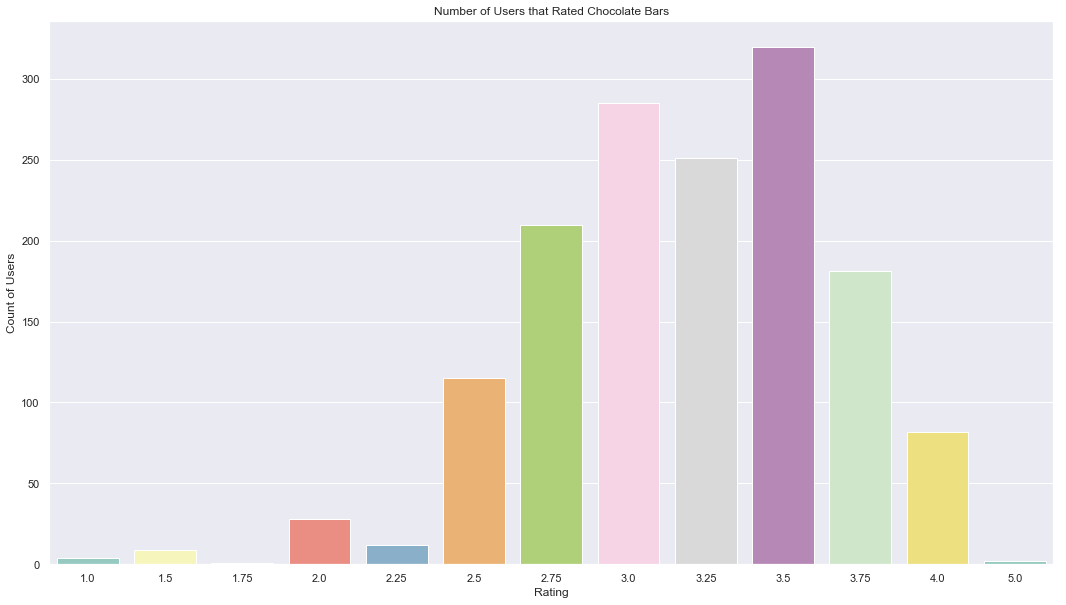

In [26]:
#Count of Choclate Bar Ratings
sns.countplot(x='Rating',data=df, palette = 'Set3')
plt.xlabel('Rating')
plt.ylabel('Count of Users')
plt.title('Number of Users that Rated Chocolate Bars')

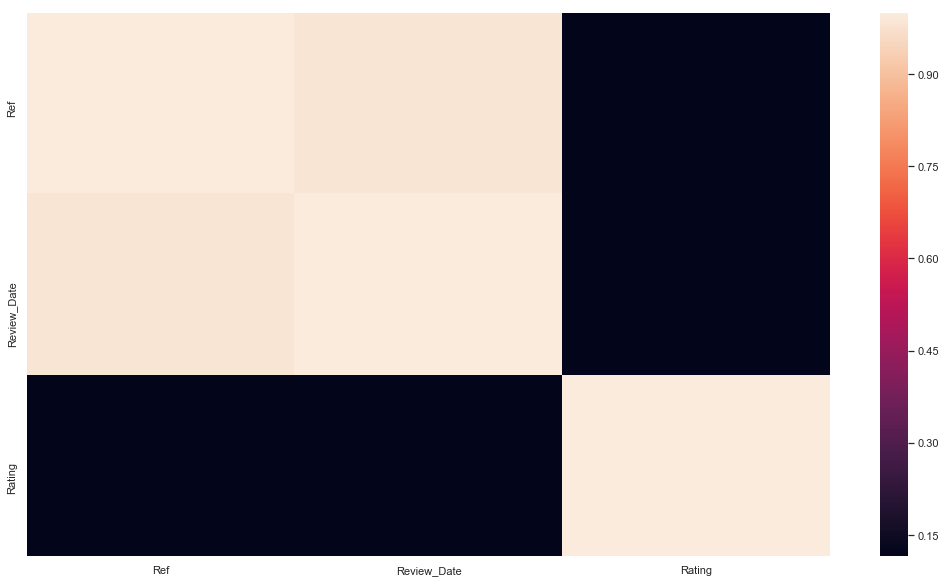

In [27]:
#checking corelation
sns.heatmap(df.corr()) 

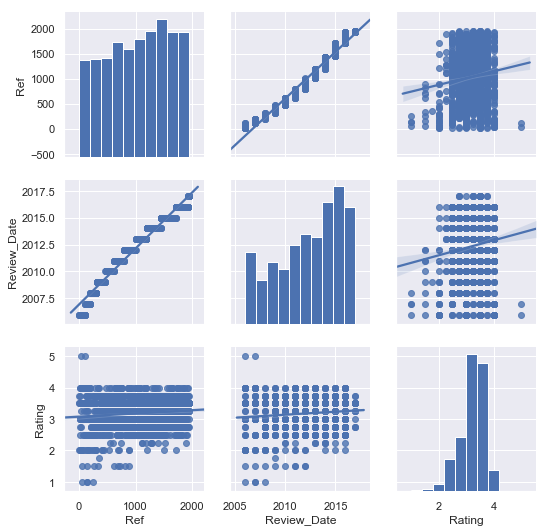

In [28]:
sns.pairplot(df, kind="reg")
plt.show()

In [29]:
df['Rating']=np.ceil(df.Rating).astype(int) 

In [30]:
df['Rating']

0       4
1       4
2       4
3       4
4       4
5       4
6       3
7       3
8       4
9       3
10      4
11      4
12      3
13      3
14      4
15      3
16      4
17      3
18      4
19      4
20      4
21      4
22      3
23      3
24      3
25      4
26      4
27      4
28      4
29      3
       ..
1470    4
1471    4
1472    4
1473    3
1474    4
1475    4
1476    2
1477    3
1478    4
1479    2
1480    4
1481    4
1482    4
1483    4
1484    4
1485    4
1486    4
1487    4
1488    4
1489    4
1490    4
1491    4
1492    3
1493    3
1494    4
1495    4
1496    4
1497    4
1498    4
1499    3
Name: Rating, Length: 1500, dtype: int32

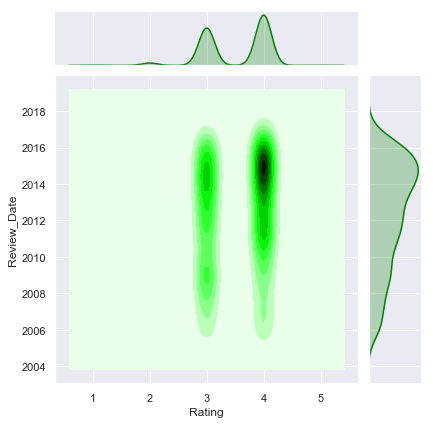

In [31]:
sns.jointplot(x = 'Rating', y= 'Review_Date', data = df, kind='kde', color = 'green')

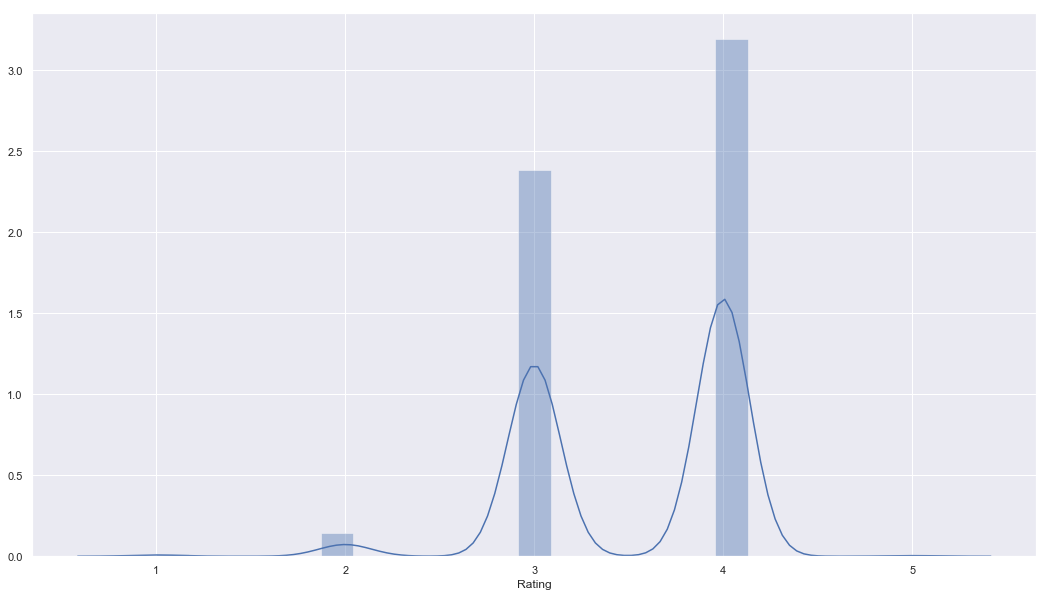

In [32]:
sns.distplot(df['Rating'])

In [33]:
#Data set informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
Company_Makers                      1500 non-null object
Specific_bean_Origin_or_Bar_Name    1500 non-null object
Ref                                 1500 non-null int64
Review_Date                         1500 non-null int64
Cocoa_Percent                       1500 non-null object
Company_Location                    1500 non-null object
Rating                              1500 non-null int32
Bean_Type                           1500 non-null object
Broad_Bean_Origin                   1500 non-null object
dtypes: int32(1), int64(2), object(6)
memory usage: 99.7+ KB


In [34]:
df['Cocoa_Percent'].str.replace('%','').astype(float)

0       64.0
1       80.0
2       70.0
3       70.0
4       65.0
5       70.0
6       70.0
7       70.0
8       70.0
9       80.0
10      70.0
11      70.0
12      70.0
13      68.0
14      73.0
15      72.0
16      74.0
17      65.0
18      70.0
19      60.0
20      70.0
21      75.0
22      72.0
23      55.0
24      70.0
25      75.0
26      73.0
27      70.0
28      70.0
29      70.0
        ... 
1470    70.0
1471    76.0
1472    68.0
1473    70.0
1474    70.0
1475    74.0
1476    65.0
1477    75.0
1478    67.0
1479    75.0
1480    72.0
1481    70.0
1482    75.0
1483    68.0
1484    70.0
1485    70.0
1486    74.0
1487    75.0
1488    72.0
1489    63.0
1490    68.0
1491    73.0
1492    77.0
1493    70.0
1494    75.0
1495    70.0
1496    58.0
1497    64.0
1498    72.0
1499    70.0
Name: Cocoa_Percent, Length: 1500, dtype: float64

In [35]:
cat_cols=['Company_Makers','Specific_bean_Origin_or_Bar_Name','Cocoa_Percent','Company_Location','Bean_Type','Broad_Bean_Origin'] 

In [36]:
#one-hot encoding
dummies=pd.get_dummies(df,columns = cat_cols) 
dummies.columns#checking the resulted column

Index([u'Ref', u'Review_Date', u'Rating', u'Company_Makers_A. Morin',
       u'Company_Makers_AMMA', u'Company_Makers_Acalli', u'Company_Makers_Adi',
       u'Company_Makers_Aequare (Gianduja)', u'Company_Makers_Ah Cacao',
       u'Company_Makers_Akesson's (Pralus)',
       ...
       u'Broad_Bean_Origin_Ven., Trinidad, Mad.',
       u'Broad_Bean_Origin_Ven.,Ecu.,Peru,Nic.',
       u'Broad_Bean_Origin_Venez,Africa,Brasil,Peru,Mex',
       u'Broad_Bean_Origin_Venezuela',
       u'Broad_Bean_Origin_Venezuela, Dom. Rep.',
       u'Broad_Bean_Origin_Venezuela, Ghana',
       u'Broad_Bean_Origin_Venezuela, Java',
       u'Broad_Bean_Origin_Venezuela, Trinidad', u'Broad_Bean_Origin_Vietnam',
       u'Broad_Bean_Origin_West Africa'],
      dtype='object', length=1516)

In [37]:
#Feature Vairables and Target Variable
X = dummies.drop('Rating',axis=1)                                                  
y = dummies['Rating'] 

In [38]:
y #Rating values (Target Variable)

0       4
1       4
2       4
3       4
4       4
5       4
6       3
7       3
8       4
9       3
10      4
11      4
12      3
13      3
14      4
15      3
16      4
17      3
18      4
19      4
20      4
21      4
22      3
23      3
24      3
25      4
26      4
27      4
28      4
29      3
       ..
1470    4
1471    4
1472    4
1473    3
1474    4
1475    4
1476    2
1477    3
1478    4
1479    2
1480    4
1481    4
1482    4
1483    4
1484    4
1485    4
1486    4
1487    4
1488    4
1489    4
1490    4
1491    4
1492    3
1493    3
1494    4
1495    4
1496    4
1497    4
1498    4
1499    3
Name: Rating, Length: 1500, dtype: int32

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [40]:
model = []
algorithm=[]

<b>Random Forest </b> 

In this section,to observe the behaviour of the mode, a random forest classifier with some hyperparameters is generated. A parameter grid is described in the next section to check how the model performs with various set of hyper-parameters. 

In [41]:
rfc = RandomForestClassifier(random_state = 0,
                                  n_estimators = 50,
                                  max_depth = 55, 
                                  min_samples_split = 10,  min_samples_leaf = 2)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
algorithm.append("Random Forest")
accuracy_trn = accuracy_score(y_train, rfc.predict(X_train))#calculating train accuracy
print("Training Accuracy: %.2f%%" % (accuracy_trn * 100.0))
from sklearn.metrics import accuracy_score
accuracy_RandomForest = accuracy_score(y_test, rfc_pred)#calculating test accuracy
print("Test Accuracy: %.2f%%" % (accuracy_RandomForest * 100.0))
print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_pred))
print("Classification Report")
print(classification_report(y_test, rfc_pred))
print("Cross Validation Scores")
rfc_score = cross_val_score(rfc, X,y, cv=5) 
print(rfc_score)
model.append(rfc_score)
print('\n')
print("Mean Cross Validation Score: ", rfc_score.mean())

Training Accuracy: 74.33%
Test Accuracy: 68.00%
Confusion Matrix
[[  0   0   2   0   0]
 [  0   0   5   2   0]
 [  0   0  51  72   0]
 [  0   0  14 153   0]
 [  0   0   0   1   0]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.71      0.41      0.52       123
           4       0.67      0.92      0.77       167
           5       0.00      0.00      0.00         1

   micro avg       0.68      0.68      0.68       300
   macro avg       0.28      0.27      0.26       300
weighted avg       0.66      0.68      0.65       300

Cross Validation Scores
[0.59933775 0.58609272 0.62       0.61204013 0.59259259]


('Mean Cross Validation Score: ', 0.6020126379896032)


<b>KNN with 5 values (5 Models) N= 5,6,7,8,9,10</b>

In [42]:
knbr= range(1,11)
knn_cv_score= []
for k in knbr:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn_score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')# CV with five fold
    knn_cv_score.append(knn_score.mean())
ideal_knn= knbr[np.argmax(knn_cv_score)]
#print(ideal_knn)
algorithm.append("KNN")
kValues = [5, 6, 7, 8, 9, 10]
for eachK in kValues:
    knn= KNeighborsClassifier(n_neighbors=eachK)
    knn_trained2= knn.fit(X_train, y_train)
    y_predict= knn_trained2.predict(X_test)
    # Training
    knn.fit(X_train, y_train)
    # Testing
    print('-'*20)
    print('N =', eachK)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test, y_predict))
    accuracy_knn = accuracy_score(y_train, knn_trained2.predict(X_train)) #calculating train accuracy
    print("Training Accuracy: %.2f%%" % (accuracy_knn * 100.0))
    accuracy2 = accuracy_score(y_test, y_predict)#calculating test accuracy
    print("Test Accuracy: %.2f%%" % (accuracy2 * 100.0))
    print("Classification Report")
    print(classification_report(y_test, y_predict))
    print('-'*20)
    print("Cross Validation Scores")
    knn_score = cross_val_score(knn, X,y, cv=5) 
    print(knn_score)
    model.append(knn_score)
    print('\n')
    print("Mean Cross Validation Score: ", knn_score.mean())

--------------------
('N =', 5)
Confusion matrix: 
[[  0   0   1   1   0]
 [  0   1   4   2   0]
 [  0   3  62  58   0]
 [  0   2  37 128   0]
 [  0   0   0   1   0]]
Training Accuracy: 72.08%
Test Accuracy: 63.67%
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.17      0.14      0.15         7
           3       0.60      0.50      0.55       123
           4       0.67      0.77      0.72       167
           5       0.00      0.00      0.00         1

   micro avg       0.64      0.64      0.64       300
   macro avg       0.29      0.28      0.28       300
weighted avg       0.62      0.64      0.63       300

--------------------
Cross Validation Scores
[0.5794702  0.5794702  0.59666667 0.52508361 0.59259259]


('Mean Cross Validation Score: ', 0.5746566537300772)
--------------------
('N =', 6)
Confusion matrix: 
[[  0   0   1   1   0]
 [  0   1   4   2   0]
 [  0   0  75  48  

<b>Logistic Regression</b>

In [43]:
lr = LogisticRegression(random_state = 0)

# fitting the training data to model
lr.fit(X_train, y_train)
algorithm.append("Logistic Regression")

#Making Predictions
lr_predict = lr.predict(X_test)

accuracy = accuracy_score(y_test, lr_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_train, lr.predict(X_train))
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))

logreg_cv_score = cross_val_score(lr, X, y, cv=5) 

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, lr_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, lr_predict))
print('\n')

print("Cross Validation Scores")
lr_score = cross_val_score(lr, X,y, cv=5) 
print(lr_score)
model.append(lr_score)
print('\n')
print("Mean Cross Validation Score: ", lr_score.mean())

Test Accuracy: 69.00%
Training Accuracy: 87.67%
=== Confusion Matrix ===
[[  0   0   1   1   0]
 [  0   0   6   1   0]
 [  0   0  77  46   0]
 [  0   0  37 130   0]
 [  0   0   1   0   0]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.63      0.63      0.63       123
           4       0.73      0.78      0.75       167
           5       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69       300
   macro avg       0.27      0.28      0.28       300
weighted avg       0.67      0.69      0.68       300



Cross Validation Scores
[0.6192053  0.58609272 0.64       0.61204013 0.63636364]


('Mean Cross Validation Score: ', 0.6187403566775868)


In [44]:
algo = { 'model': ['RandomForest', 'KNN Classifier', 'Logistic Regression'], 'Validation Scores': [rfc_score.mean(),knn_score.mean() , lr_score.mean()] }
gp = pd.DataFrame (algo, columns = ['model', 'Validation Scores'])

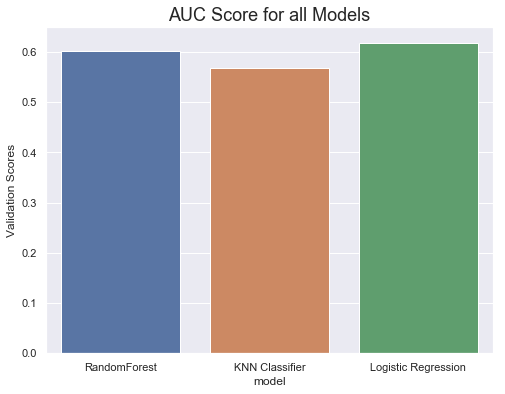

In [45]:
plt.figure(figsize = (8,6))
plt.title('AUC Score for all Models',fontsize=18)
s = sns.barplot(x='model',y='Validation Scores',data=gp)
plt.show()

In [46]:
# Generate the model.pickle file
import pickle
filehandler = open('model.pickle', 'w')
pickle.dump(lr, filehandler)